<h1 align ='center'> Machine Learning, Airbnb Data Modeling <h1>
<h2 align ='left'> Authors: <h2>
<h3 align ='left'>Juan Diego M. Flores<h3>
<h3 align ='left'>Julio Manuel Lugo<h3>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import time

%matplotlib inline

## Dataset Exploration

### Quick view

this data set consists on 48864 entries, There are also 106 variables out of which 105 are feature variables and one (price) is a response variable. 

In [63]:
data = pd.read_csv('./listings.csv', low_memory=False)

data.shape

(48864, 106)

In [64]:
data.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20190806030549,2019-08-07,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.39
1,3647,https://www.airbnb.com/rooms/3647,20190806030549,2019-08-06,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN


if we list features:


In [65]:
print(sorted(data.columns))

['access', 'accommodates', 'amenities', 'availability_30', 'availability_365', 'availability_60', 'availability_90', 'bathrooms', 'bed_type', 'bedrooms', 'beds', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'calendar_last_scraped', 'calendar_updated', 'cancellation_policy', 'city', 'cleaning_fee', 'country', 'country_code', 'description', 'experiences_offered', 'extra_people', 'first_review', 'guests_included', 'has_availability', 'host_about', 'host_acceptance_rate', 'host_has_profile_pic', 'host_id', 'host_identity_verified', 'host_is_superhost', 'host_listings_count', 'host_location', 'host_name', 'host_neighbourhood', 'host_picture_url', 'host_response_rate', 'host_response_time', 'host_since', 'host_thumbnail_url', 'host_total_listings_count', 'host_url', 'host_verifications', 'house_rules', 'id', 'instant_bookable', 'interaction', 'is_business_travel_

## Quick Analisis of the features. 

Here we have a list of the most important features divided in numerical an categorical. 


### Numerical Features

- *price:* the price per night; response variable, the most important variable
- *accommodates:* the number of guests the rental can accommodate
- *bedrooms:* number of bedrooms included in the rental
- *bathrooms:* number of bathrooms included in the rental
- *beds:* number of beds included in the rental
- *minimum_nights:* minimum number of nights a guest can stay for the rental
- *maximum_nights:* maximum number of nights a guest can stay for the rental
- *number_of_reviews:* number of reviews that previous guests have left
- *security_deposit:* required based on property type or length of stay
- *cleaning_fee:* cleaning costs
- *square_feet:* amount of space
- *guests_included:* number of guests booker want to include
- *extra_people:* cost of additional person per night
- *latitude:* locational coordinate; used by Charlie for geospatial modeling 
- *longitude:* locational coordinate; used by Charlie for geospatial modeling

### Categorical Features

- *calendar_updated:* property listing date; will be discarded later
- *property_type:* house, townhouse, apartment, condo, hostel, cabin, etc.
- *room_type:* entire home/apt, private room or shared room
- *bed_type:* real bed, pull-out sofa, futon, airbed, and couch.
- *neighbourhood_cleansed:* neighborhood e.g. Midtown, Harlem, Murray Hill, etc.
- *cancellation_policy:* 6 categories: super_strict_60, super_strict_30, strict_14_with_grace_period, strict, moderate, and flexible.
- *amenities:* Wifi, TV, kitchen, smoke detector, air conditioning, etc.1 
- *instant_bookable:* This is a feature that hosts can select for their listing which removes the approval process. Instead of being notified that someone is interested in your place and then giving them the thumbs up/down – guests can just choose their dates, book, and discuss check-in plans later.
- *host_is_superhost:* describes highly rated and relaible hosts (true/false).
- *host_has_profile_pic:* whether or not hosts has pictures on their profile (true/false)
- *host_identity_verified:* whether or not the the identity of the host has been verified (true/false).
- *require_guest_profile_picture:* important feature since people tend to be hesistant about releasing their pictures.

## Droping unnecessary variables

In [66]:
keeped_features = [
        'neighbourhood_cleansed',
        'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'host_id',
        'host_since',
        'host_is_superhost', 'host_listings_count',
        'host_total_listings_count', 'host_verifications',
        'host_has_profile_pic', 'host_identity_verified', 'latitude',
        'longitude', 'is_location_exact', 'property_type', 'room_type',
        'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
        'amenities', 'security_deposit', 'cleaning_fee',
        'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
        'minimum_minimum_nights', 'maximum_minimum_nights',
        'minimum_maximum_nights', 'maximum_maximum_nights',
        'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
        'has_availability', 'availability_30', 'availability_60',
        'availability_90', 'availability_365', 'calendar_last_scraped',
        'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
        'require_guest_profile_picture', 'require_guest_phone_verification',
        'calculated_host_listings_count',
        'calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms',
        'calculated_host_listings_count_shared_rooms',
        'number_of_reviews','price'
    ]

droped_features = [i for i in data.columns if i not in keeped_features]

data_filtered = data.copy()
data_filtered.drop(droped_features, axis=1, inplace=True)
data = data_filtered.copy()

In [67]:
data.shape

(48864, 54)

## Discarting old entries

Airbnb post that are more than a year old has no realistic price that is why we are going to discard those.

In [68]:
def discard_old_entries(df):
        
    more_than_12months=sorted(df[df['calendar_updated'].str.contains(
    'months ago')]['calendar_updated'].unique())
    
    more_than_12months=[i for i in more_than_12months if int(i[:-10])>12]
    
        
    for i in more_than_12months:

        j=df[df['calendar_updated'].str.contains(i)].index

        df.drop(df.index[j],inplace=True)
        df.reset_index(drop=True,inplace=True)

    df.drop('calendar_updated', axis=1, inplace=True)
        
    return df

data = discard_old_entries(data)
data.shape

(37359, 53)

In [69]:
data.head()

,host_id,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,...,number_of_reviews,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2845,2008-09-09,f,5.0,5.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,Midtown,Manhattan,...,46,f,f,strict_14_with_grace_period,t,t,2,1,0,1
1,4869,2008-12-07,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Clinton Hill,Brooklyn,...,274,f,f,moderate,f,f,1,1,0,0
2,7192,2009-01-29,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,East Harlem,Manhattan,...,9,f,f,strict_14_with_grace_period,t,t,1,1,0,0
3,7322,2009-02-02,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Murray Hill,Manhattan,...,75,f,f,strict_14_with_grace_period,t,t,1,1,0,0
4,8967,2009-03-03,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Hell's Kitchen,Manhattan,...,434,f,f,strict_14_with_grace_period,f,f,1,0,1,0


## Casting variable values to correct type

The 'price', 'security deposit', 'cleaning fee', 'extra_people' columns carry the dollar sign \\$; this must be removed. Also, the amenities column contain unwanted characters. We will also replace "Cable TV" in the amenities with "TV".

In [70]:
def clean_dataframe(df):
    
    for i in ['price','cleaning_fee','security_deposit', 'extra_people']:
        df[i]=df[i].str.replace('$','').str.replace(',', '').astype(float)
    
    df['amenities']=df['amenities'].str.replace('{}','').str.replace('{ }','')
    
    df['amenities']=df['amenities'].str.replace(
    '$','').str.replace('{','').str.replace('}','').str.replace(
    '"','').str.replace(' toilet','toilet').str.replace('Cable TV','TV')

    df.replace('', np.nan, inplace=True)
    
    return df

data=clean_dataframe(data)
data.shape


(37359, 53)

our data has been casted

In [71]:
data[['amenities', 'price','cleaning_fee','security_deposit', 'extra_people']]

,amenities,price,cleaning_fee,security_deposit,extra_people
0,"TV,Wifi,Air conditioning,Kitchen,Paid parking ...",225.0,100.0,350.0,0.0
1,"TV,TV,Internet,Wifi,Air conditioning,Kitchen,P...",89.0,NaN,500.0,0.0
2,"Internet,Wifi,Air conditioning,Kitchen,Elevato...",80.0,80.0,100.0,20.0
3,"TV,TV,Internet,Wifi,Kitchen,Buzzer/wireless in...",200.0,125.0,300.0,100.0
4,"TV,Wifi,Air conditioning,Paid parking off prem...",79.0,15.0,NaN,12.0
...,...,...,...,...,...
37354,"TV,Wifi,Air conditioning,Kitchen,Pets allowed,...",65.0,NaN,NaN,0.0
37355,"Wifi,Kitchen,Elevator,Heating,Washer,Dryer,Smo...",60.0,NaN,NaN,0.0
37356,"TV,TV,Wifi,Air conditioning,Kitchen,Paid parki...",239.0,0.0,0.0,20.0
37357,"Wifi,Air conditioning,Kitchen,Elevator,Heating...",75.0,40.0,300.0,0.0


## Analize missing values

As we can see in the dataframe there are some variables with missing values if we evaluate missing data:

In [72]:
def identify_set(df):
    categorical = df.columns[df.dtypes == 'object']
    numerical = df.columns[df.dtypes != 'object']
    return(numerical, categorical)

numerical_set, categorical_set = identify_set(data)

def identify(i, numerical_set):
    if i in numerical_set: 
        return('numerical')
    else:
        return('categorical')
    
def show_missing_data(df, numerical_set):
    df_sorted = df.isnull().sum()
    df_sorted.sort_values(axis=0,ascending=False,inplace=True)
    number_of_rows=len(df)
    missing_types=[identify(i, numerical_set) for i in df_sorted.index]
    headers=[tuple(df[i].head(n=5)) for i in df_sorted.index]
    tmp1 = pd.DataFrame({'Feature':df_sorted.index, 
                         'Missing values':df_sorted.values})
    tmp1['Feature type']=pd.Series(missing_types, index=tmp1.index)
    tmp1['Percentage missing']=pd.Series(df_sorted.values*100/number_of_rows, index=tmp1.index)
    tmp1['First 5 values']=pd.Series(headers, index=tmp1.index)
    return tmp1 

In [73]:
tmp = show_missing_data(data, numerical_set)
tmp[tmp['Percentage missing'] > 0.0]

,Feature,Missing values,Feature type,Percentage missing,First 5 values
0,security_deposit,10545,numerical,28.226130,"(350.0, 500.0, 100.0, 300.0, nan)"
1,cleaning_fee,5721,numerical,15.313579,"(100.0, nan, 80.0, 125.0, 15.0)"
2,zipcode,334,categorical,0.894028,"(10018, 11238, 10029, 10016, 10019)"
3,city,56,categorical,0.149897,"(New York, Brooklyn, New York, New York, New Y..."
4,amenities,52,categorical,0.139190,"(TV,Wifi,Air conditioning,Kitchen,Paid parking..."
5,bathrooms,33,numerical,0.088332,"(1.0, 1.0, 1.0, 1.0, 1.0)"
6,beds,22,numerical,0.058888,"(1.0, 4.0, 1.0, 1.0, 1.0)"
7,bedrooms,21,numerical,0.056211,"(0.0, 1.0, nan, 1.0, 1.0)"
8,host_since,7,categorical,0.018737,"(2008-09-09, 2008-12-07, 2009-01-29, 2009-02-0..."
9,host_is_superhost,7,categorical,0.018737,"(f, f, f, f, f)"


## Process missing values

- missing values for 'security_deposit' and 'cleaning_fee' will be replaced with zero values
- rows with missing values on 'zipcode','amenities', 'cancellation_policy', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic'and 'host_identity_verified' will be dropped. 
- columns 'city' and 'host_since' will be dropped
- missing values on 'beds','bathrooms','bedrooms' and 'state' will be replaced with their respective modal values

In [74]:
def drop_features_and_impute_values(df):
    df['security_deposit'].fillna(0.0,inplace=True)
    df['cleaning_fee'].fillna(0.0,inplace=True)
    df.dropna(subset=['zipcode','amenities',
                      'cancellation_policy',
                      'host_is_superhost',
                      'host_listings_count',
                      'host_total_listings_count',
                      'host_has_profile_pic',
                      'host_identity_verified'
                     ],inplace=True)
    df.drop('city', axis=1, inplace=True) 
    df.drop('host_since',axis=1,inplace=True)
    
    ftodrop=['beds','bathrooms','bedrooms','state']
    
    for i in ftodrop:
        df[i].fillna(df[i].mode()[0], inplace=True)
        
    df.reset_index(drop=True,inplace=True)

In [75]:
drop_features_and_impute_values(data)

In [76]:
data.shape

(36969, 51)

## Check if missing data has been processed

In [77]:
print(data.shape)
print(data.isnull().values.any())

(36969, 51)
False


## Data analysis and process outliers

We will take a look at the prices with an histogram as well as the log transformed prices. We want the prices for the distribution which sufficiently follows a normal distribution in the machine learning modeling. Also we will take particular notice of outliers (extreme values) and drop them.

In [78]:
def price_histograms(df):
    plt.rcParams['figure.figsize']=(20,4)
    plt.style.use(style='ggplot')
    _,sub=plt.subplots(1,2)
    
    sub[0].hist(df.price, color='grey')
    sub[0].set_title('price; skewness=%.5f'%(df.price.skew()),fontsize=20)
    sub[0].set_xlabel('Price',fontsize=20)
    sub[0].tick_params(labelsize=16)
    
    sub[1].hist(np.log1p(df.price), color='grey')
    sub[1].set_title('Log transfromed price; skewness=%.5f'%(np.log1p(df.price).skew()),fontsize=20)
    sub[1].set_xlabel('log(Price)',fontsize=20)
    sub[1].tick_params(labelsize=16)
    
    plt.show()

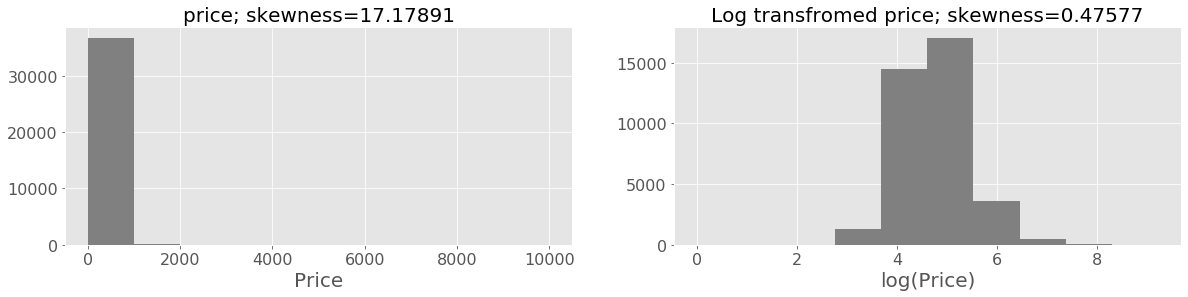

In [79]:
price_histograms(data)

looking at the plots we see that some proces are quite extreme, in order to quantitatively have a summary of the price we use:

In [80]:
data['price'].describe()

count    36969.000000
mean       152.361952
std        217.365907
min          0.000000
25%         69.000000
50%        110.000000
75%        180.000000
max       9999.000000
Name: price, dtype: float64

we observed that the data has effectly extreme values. Lets see what happends when we plot histogram of prices under 1000$

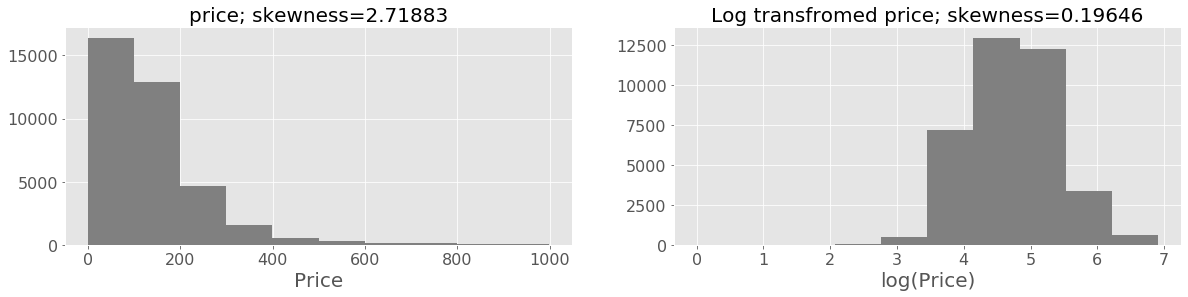

In [81]:
price_histograms(data[data['price'] < 1000])

it is obvious that a tiny fraction of the prices are above 1000$, the fraction is:

In [82]:
print('Percentage of prices exceeding $1000 is {:0.4f}%'
      .format(data[data['price']>1000].count()[0]/data.shape[0] * 100),'\n')

Percentage of prices exceeding $1000 is 0.4166% 



In [83]:
def drop_outliers(df,feature,low_value,high_value):
    df = df[df[feature]>low_value]
    df = df[df[feature]<=high_value]
    df.reset_index(drop=True,inplace=True)
    return df

In [84]:
data = drop_outliers(data, 'price', 0, 1000)
data.shape

(36807, 51)

### Ploting prices versus numerical features

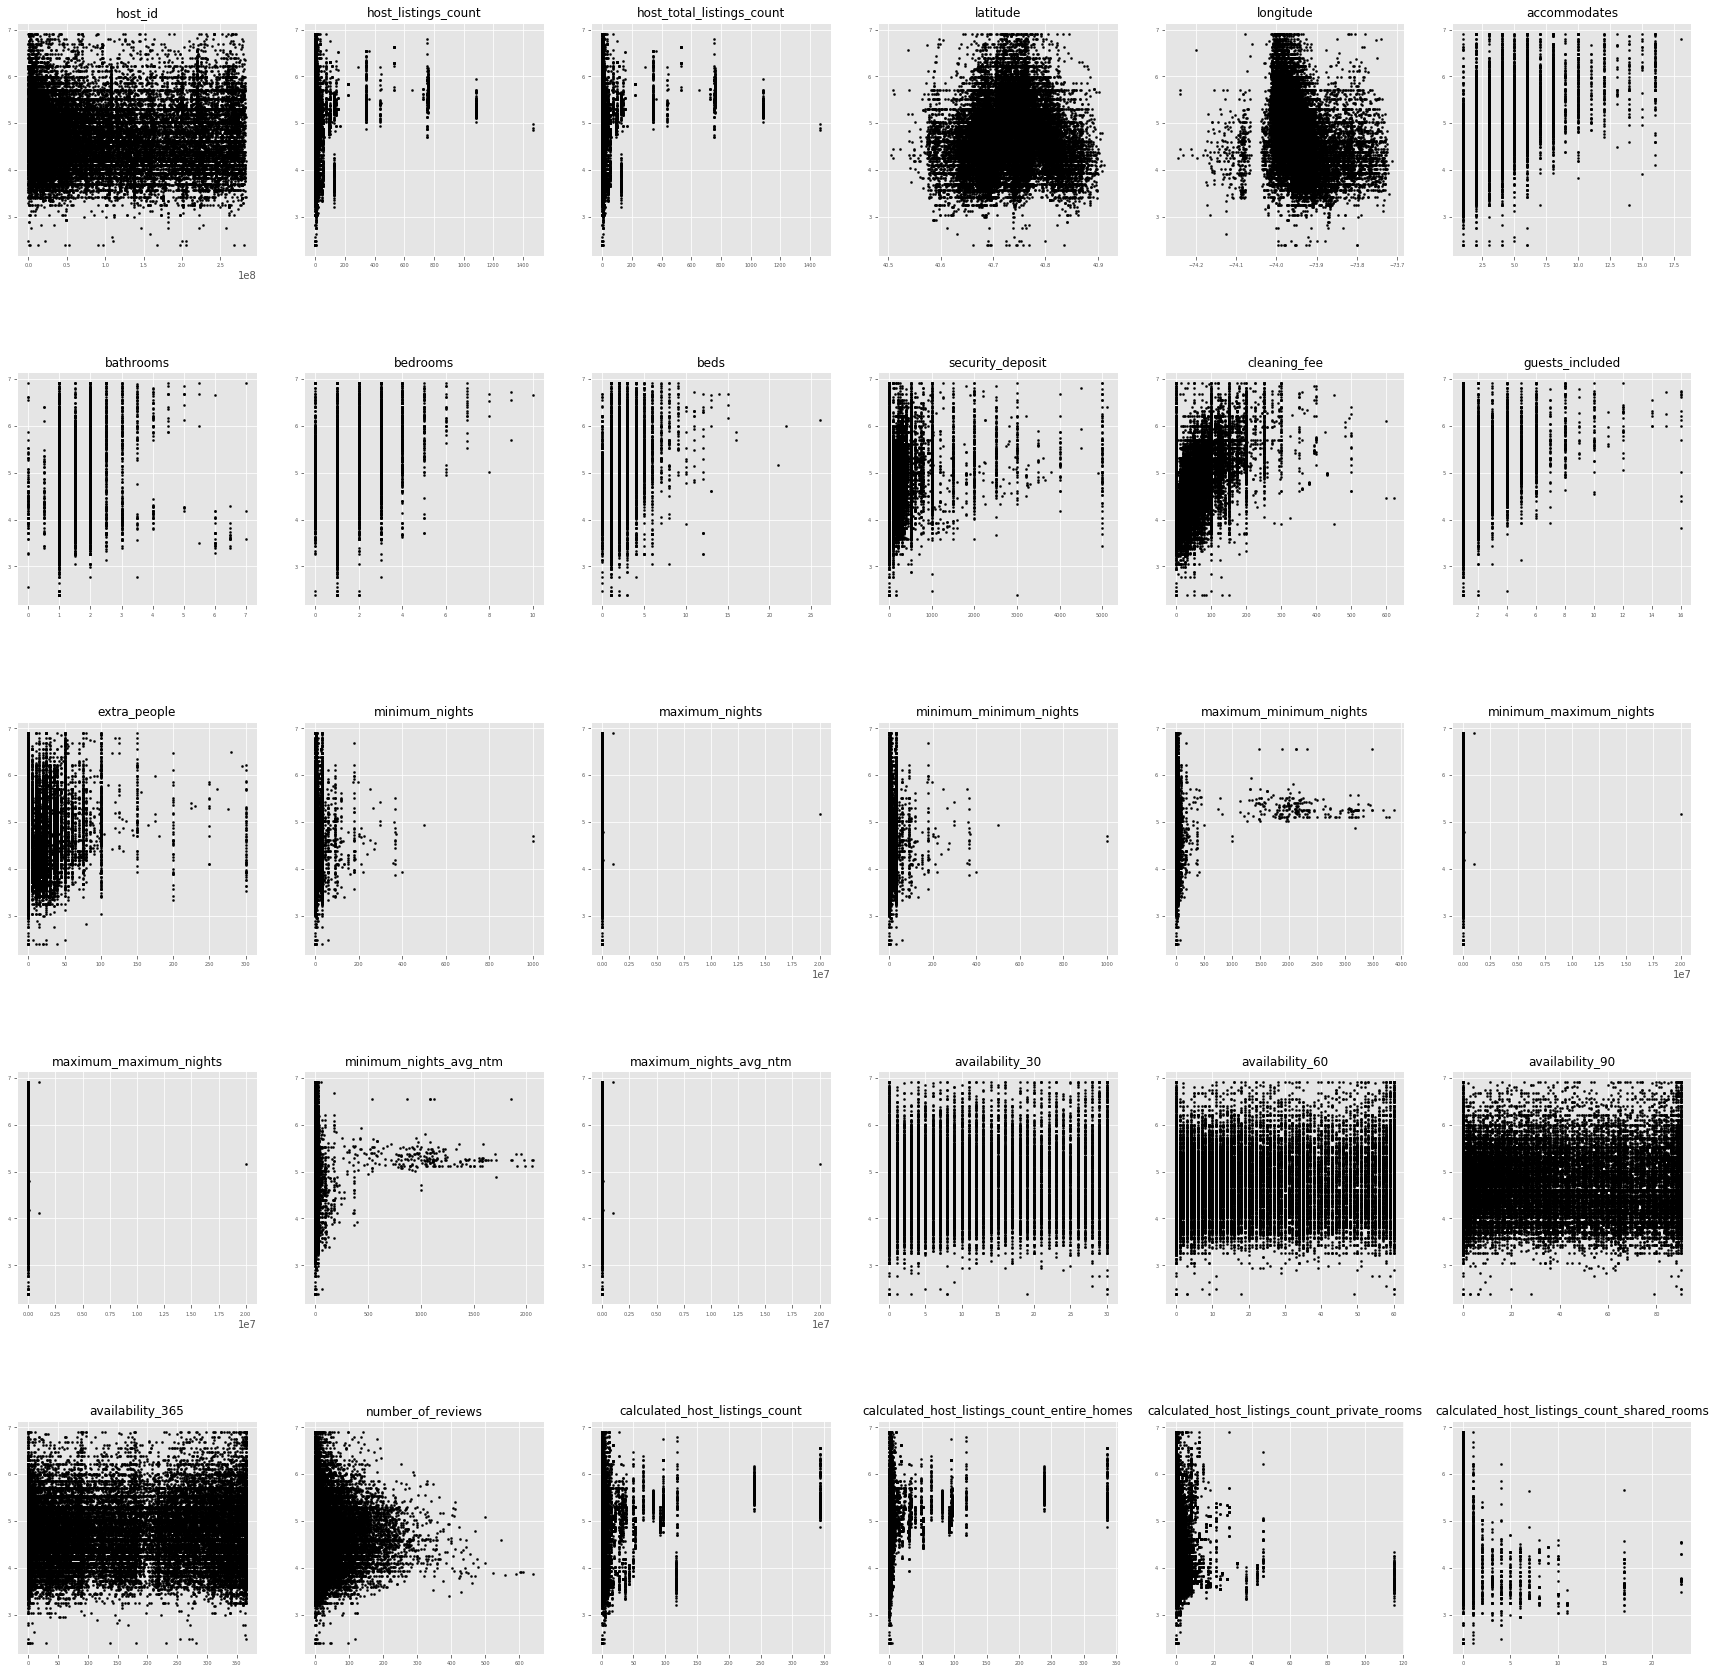

In [85]:
def features_vs_price(features, df):
    plt.rcParams['figure.figsize']=(30, 30)
    plt.style.use(style='ggplot')
    adjust, sub=plt.subplots(5,6)
    adjust.subplots_adjust(hspace=0.5)
    sub=sub.flatten()
    for i in range(len(features)):
        sub[i].scatter(x=df[features[i]], y=np.log1p(df["price"]), color = 'black',s=4)
        sub[i].set_title(features[i],fontsize=12)
        sub[i].tick_params(labelsize=5)
    plt.show()

numerical_set_list = list(numerical_set)
numerical_set_list.remove('price')
features_vs_price(numerical_set_list, data)

it is obvious that maximum_nights and minimum_nigths has outliers we will replot with some realistic restrictions, we will restrict maximum_nigths to no more than 1200 and minimum_nigths to no more than 500. 

In [86]:
def plot_max_and_min_nights(df, cut_off_max, cut_off_min):
    df2 = df[df['maximum_nights'] < cut_off_max]
    df3 = df[df['minimum_nights'] < cut_off_min]
    plt.rcParams['figure.figsize']=(20,4)
    plt.style.use(style='ggplot')
    _,sub=plt.subplots(1,2)
    _.subplots_adjust(hspace=1)

    sub[0].scatter(x=df2['maximum_nights'], y=np.log1p(df2["price"]), color = 'black')
    sub[0].set_xlabel('maximum_nights',fontsize=25)
    sub[0].set_title('maximum_nights without outliers',fontsize=25)
    sub[0].set_ylabel('log(price)',fontsize=25)
    sub[0].tick_params(labelsize=25)

    sub[1].scatter(x=df3['minimum_nights'], y=np.log1p(df3["price"]), color = 'black')
    sub[1].set_xlabel('minimum_nights',fontsize=25)
    sub[1].set_title('minimum_nights without outliers',fontsize=25)
    sub[1].set_ylabel('log(price)',fontsize=25)
    sub[1].tick_params(labelsize=25)
    plt.show()

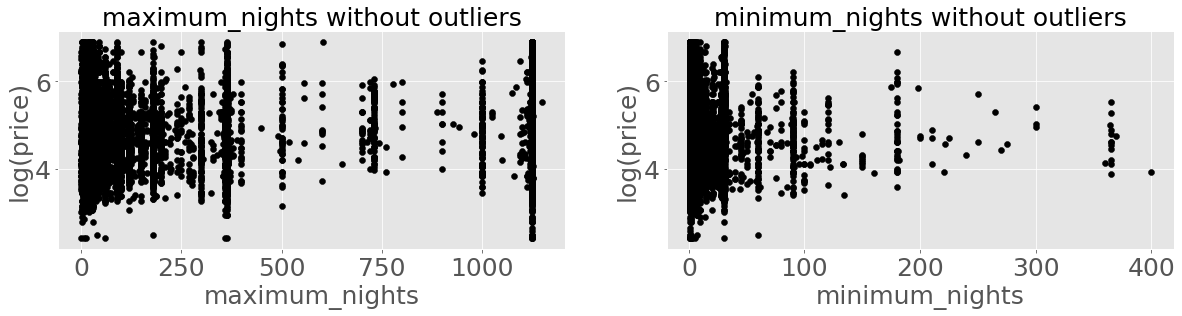

In [87]:
plot_max_and_min_nights(data, 1200, 500)

If we look at the percentage of minimum_nights exceeding 500

In [88]:
print('Percentage of minimum_nights exceeding 500 is {:0.4f}%'
      .format(data[data['minimum_nights']>500].count()[0]/data.shape[0] * 100),'\n')

Percentage of minimum_nights exceeding 500 is 0.0054% 



If we look at the percentage of maximum_nights exceeding 1200

In [89]:
print('Percentage of maximum_nights exceeding 1200 is {:0.4f}%'
      .format(data[data['maximum_nights'] > 1200].count()[0]/data.shape[0] * 100),'\n')

Percentage of maximum_nights exceeding 1200 is 0.0625% 



As we saw that is not a big percentage that is why we are going to drop values with outliers

In [90]:
data = drop_outliers(data, 'maximum_nights', 0, 1200)
data = drop_outliers(data, 'minimum_nights', 0, 500)
data.shape

(36782, 51)

## Price per property type

This variable tells what kind of property does the post have:

In [91]:
list(FreqDist(data['property_type'].tolist()).keys()).__len__()

37

it means there are 37 unique properties, if we plot the frencuenciy of each property type we have:

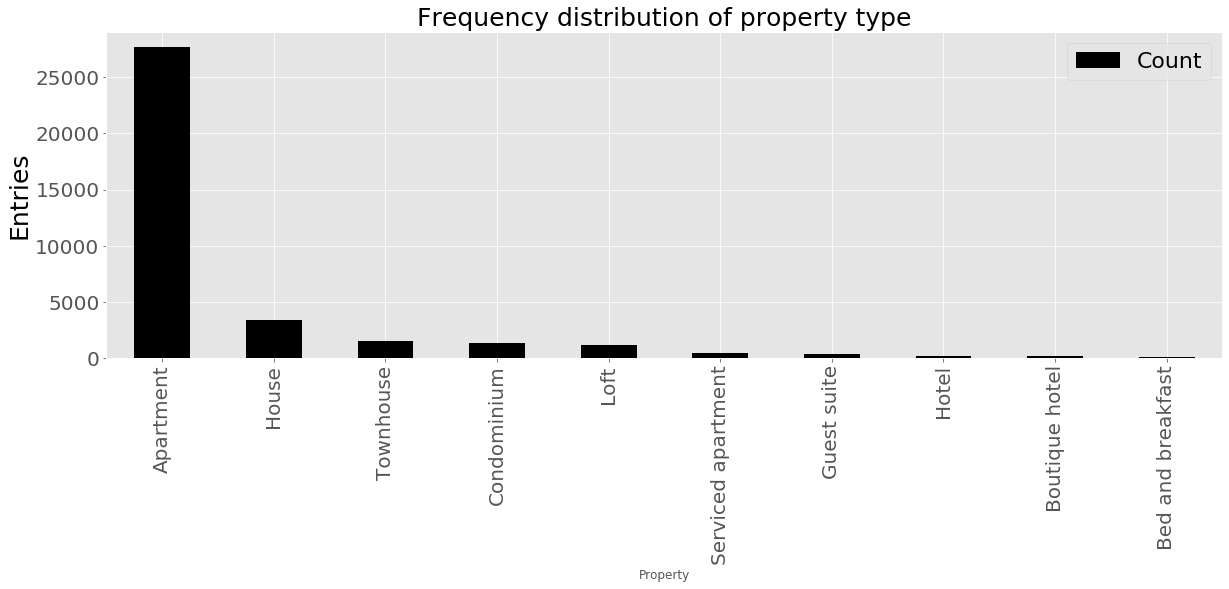

In [92]:
def plot_property_type_frecuencies(df):
    all_properties=df['property_type'].tolist()
    fdist = FreqDist(all_properties)
    prop = pd.DataFrame({'Property': list(fdist.keys()),'Count': list(fdist.values())})
    prop = prop.nlargest(columns="Count", n = 10)
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    plt.style.use(style='ggplot')
    prop.plot(x='Property',y='Count',kind='bar',color='black')
    plt.ylabel('Entries',fontsize=25,color='black')
    plt.title('Frequency distribution of property type',fontsize=25,color='black')
    plt.tick_params(labelsize=20)
    plt.xticks(rotation='vertical')
    plt.legend(fontsize=22)
    plt.show()

plot_property_type_frecuencies(data)

As the plot shows there are more apartments on the entries. Now we are intereted on plotting average price and median price per property type

In [93]:
def plot_average_price(feature, label, df, title, nlength):
    sort_price = df.groupby(feature)['price'].mean().sort_values(ascending=False)
    sort_price = sort_price.to_frame().reset_index()
    sort_price.rename(columns ={feature:label,
                           'price':'average price'}, inplace=True)
    d = sort_price.copy()
    d = d.nlargest(columns="average price", n =min(len(d),nlength))

    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    d.plot(x=label, y='average price', kind="bar",color='black')
    plt.ylabel('Average price',fontsize=25,color='black')
    plt.title(title,fontsize=25,color='black')
    plt.tick_params(labelsize=22)
    plt.legend(fontsize=20)
    plt.xticks(rotation='vertical')
    plt.show()

def plot_median_price(feature, label, df, title, nlength):
    sort_price = df.groupby(feature)['price'].median().sort_values(ascending=False)
    sort_price = sort_price.to_frame().reset_index()
    sort_price.rename(columns ={feature:label,
                           'price':'median price'}, inplace=True)
    d = sort_price.copy()
    d = d.nlargest(columns="median price", n =min(len(d),nlength))
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    d.plot(x=label, y='median price', kind="bar",color='black')
    plt.ylabel('Median price',fontsize=25,color='black')
    plt.title(title, fontsize=25,color='black')
    plt.legend(fontsize=20)
    plt.tick_params(labelsize=22)
    plt.xticks(rotation='vertical')
    plt.show()


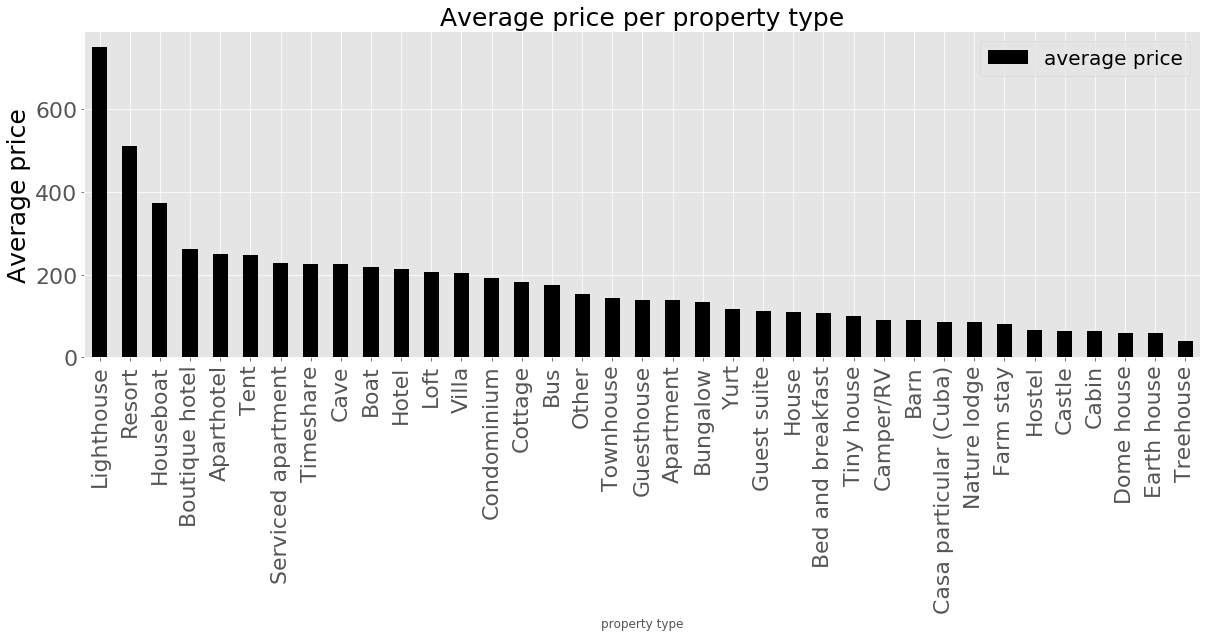

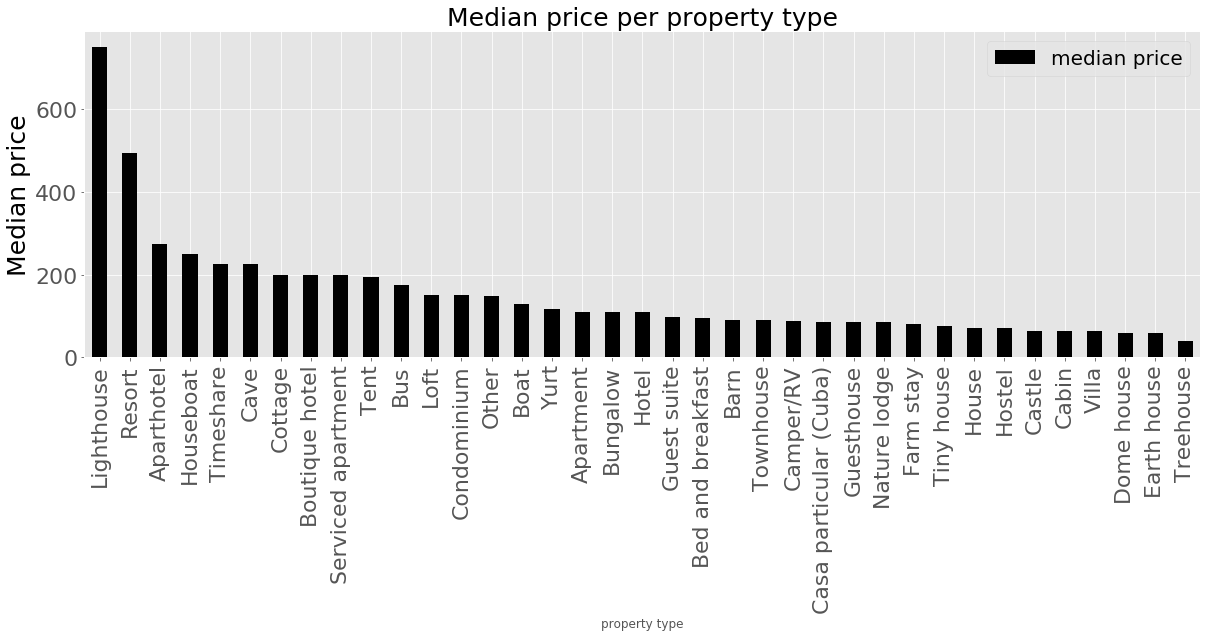

In [94]:
plot_average_price('property_type','property type', data, 'Average price per property type', 37)
plot_median_price('property_type','property type', data, 'Median price per property type', 37)

according with plots lighthouses has biggest average price 

## Price per neightboorhood

this variable tells which neightboorhod is the property located

In [95]:
list(FreqDist(data['neighbourhood_cleansed'].tolist()).keys()).__len__()

221

there are 221 different neighbourhoods, we will see price distribution for the most importat neighbourhoods. First lets look at the frecuencies

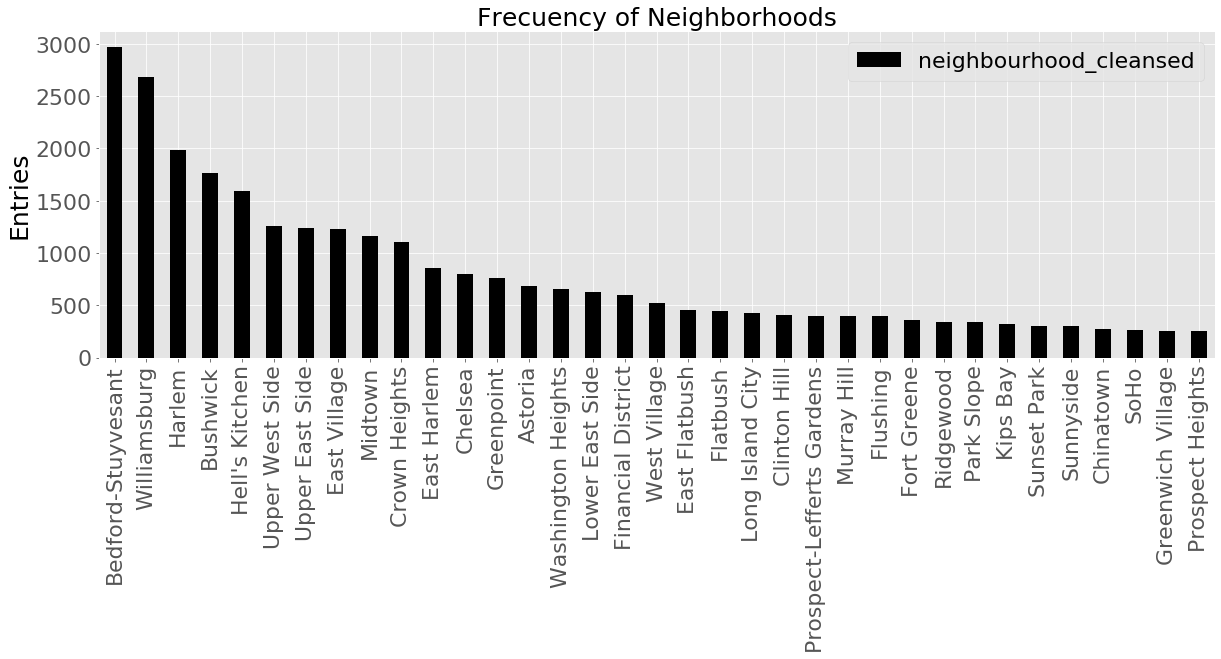

In [96]:
def neighborhoods_frecuency(df, nthreshhold):
    listings_per_nbhood = df['neighbourhood_cleansed'].value_counts()
    acceptable_nbhood = listings_per_nbhood[listings_per_nbhood >=nthreshhold].index
    acceptable_listings = df[df['neighbourhood_cleansed'].isin(acceptable_nbhood)]
    listings_per_nbhood = acceptable_listings['neighbourhood_cleansed'].value_counts()    
    listings_per_nbhood.to_frame()
    listings_per_nbhood.columns = ['neighborhood','count']
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    listings_per_nbhood.plot(x="neighborhood", y='count', kind="bar", color = 'black')
    plt.ylabel('Entries',fontsize=25,color='black')
    plt.title('Frecuency of Neighborhoods',fontsize=25,color='black')
    plt.tick_params(labelsize=22)
    plt.legend(fontsize=22)
    plt.show()

neighborhoods_frecuency(data, 250)

there are more entries located at Bedford-Stuyvesant. Now lets take a look at the average and median per neighbourhood

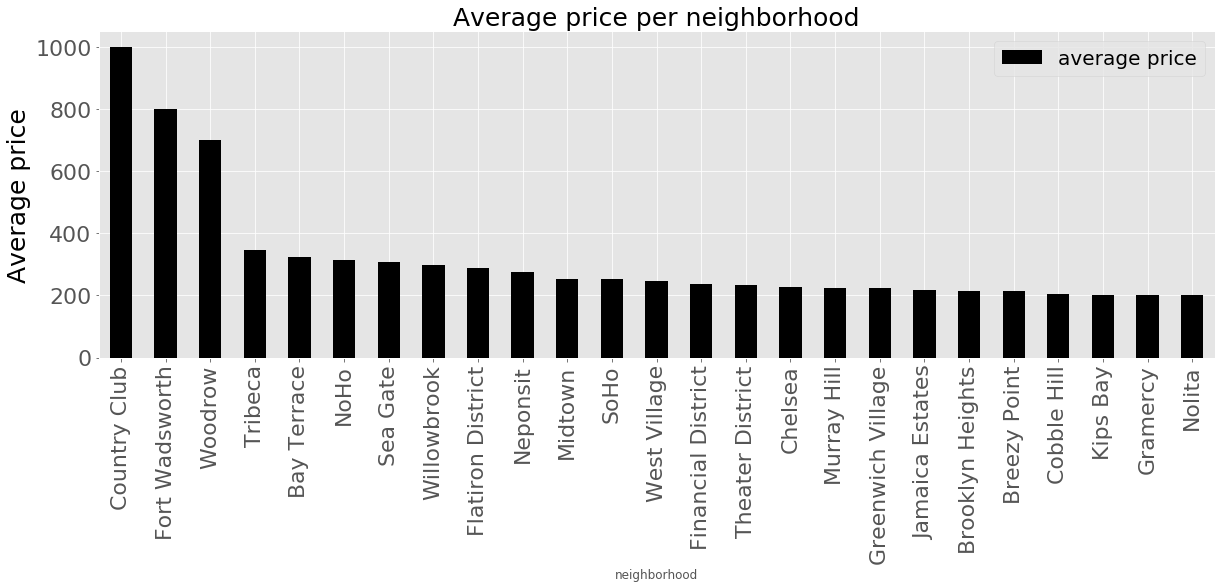

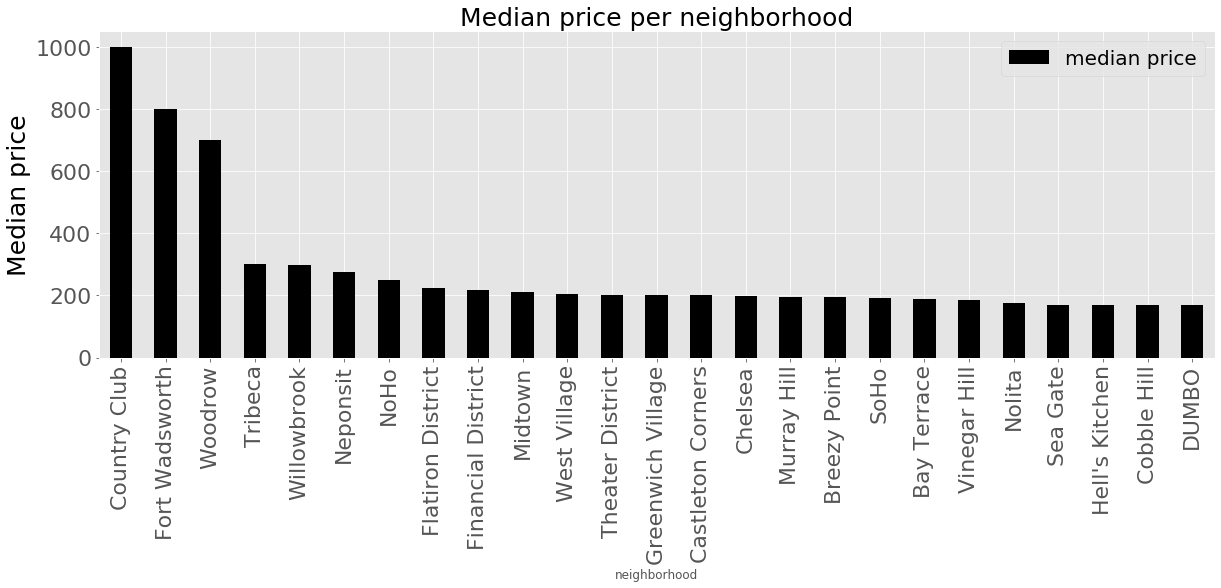

In [97]:
plot_average_price('neighbourhood_cleansed','neighborhood', data, 'Average price per neighborhood', 25)
plot_median_price('neighbourhood_cleansed','neighborhood', data, 'Median price per neighborhood', 25)

We can see how Country Club is the most expensive neighborhood

## Prices variation respect to room type

Price of an entry can vary considerably according to room type, it is described in the plot bellow.

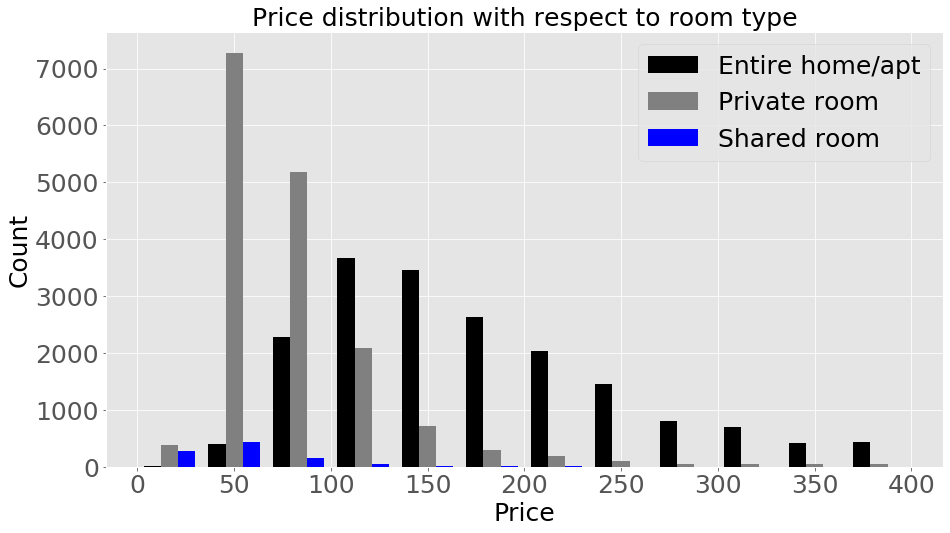

In [98]:
def room_type_count_vs_price(df,title):
    df2 = df.pivot(columns='room_type',values='price')
    x1=list(df2[df2.columns[0]])
    x2=list(df2[df2.columns[1]])
    x3=list(df2[df2.columns[2]])
    plt.rc('legend',**{'fontsize':25})
    plt.rcParams['figure.figsize']=(15,8)
    plt.style.use(style='ggplot')
    plt.tick_params(labelsize=25)
    plt.ylabel("Count",fontsize=25,color='black')
    plt.xlabel("Price",fontsize=25,color='black')
    plt.title(title,fontsize=25,color='black')
    plt.tick_params(labelsize=25)
    n_bins=12
    colors = ['black', 'grey', 'blue']
    labels=[df2.columns[0],df2.columns[1],df2.columns[2]]
    plt.hist([x1, x2, x3], n_bins, histtype='bar', 
             color=colors, range=[0,400],label=labels,alpha=1)
         
    plt.legend(loc="upper right")
    plt.show()

data_frame = data
room_type_count_vs_price(data_frame, 'Price distribution with respect to room type')

## Prices variation respect to number of beds

Price of an entry can vary considerably according to number of beds, it is described in the plot bellow.

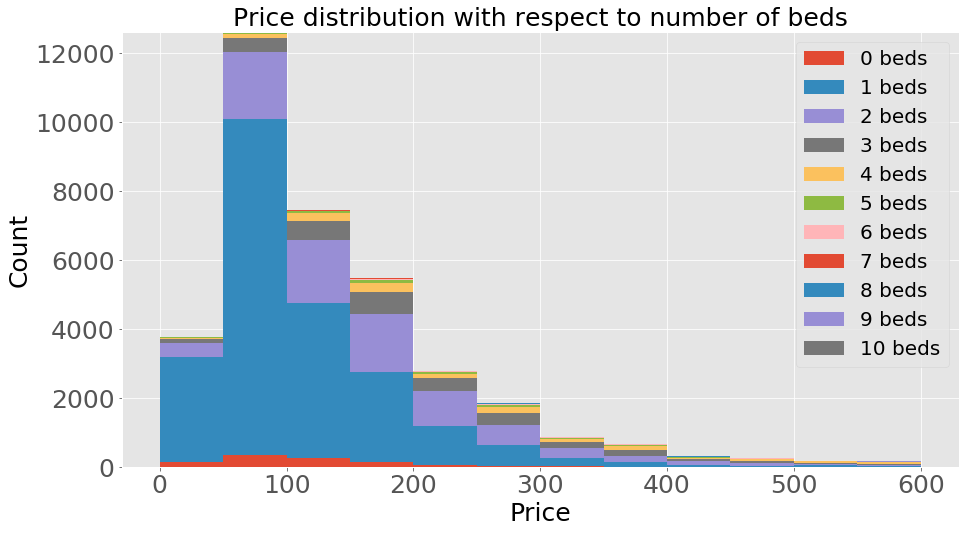

In [99]:
def number_of_beds_count_vs_price(df,title):
    df2 = df.pivot(columns='beds',values='price')
    x = [list(df2[df2.columns[i]]) for i in range(len(df2.columns)) if i <= 10]
    labels = [str(int(df2.columns[i]))+' beds' for i in range(len(df2.columns))]
    plt.rc('legend', **{'fontsize':20})
    plt.rcParams['figure.figsize']=(15,8)
    plt.style.use(style='ggplot')
    plt.tick_params(labelsize=14)
    plt.ylabel("Count",fontsize=25,color='black')
    plt.xlabel("Price",fontsize=25,color='black')
    plt.title(title,fontsize=25,color='black')
    plt.tick_params(labelsize=25)
    n_bins=12
    plt.hist(x, n_bins, stacked=True,range=[0,600],label=labels)        
    plt.legend(loc="upper right")
    plt.show()

number_of_beds_count_vs_price(data_frame, 'Price distribution with respect to number of beds')

## Prices variation respect to amenities

Every entry has a certain set of amenities for example TV, wifi, etc; there are a total of 128 unique amenities, we are interested on how frecuent an amenity is, median and average price with repect to each amenity.

Lets find out all unique amenities.

In [100]:
def get_amenities(df):
    all_amenities=df['amenities'].tolist()
    all_amenities=','.join(map(str, all_amenities)).split(',')
    unique_amenities=set(all_amenities)
    unique_amenities=list(unique_amenities)    
    return (all_amenities, unique_amenities)

all_amenities, unique_amenities = get_amenities(data)
print('Number of amenities:')
print(len(unique_amenities))
print('First five amenities:')
print(unique_amenities[:5])

Number of amenities:
128
First five amenities:
['Indoor fireplace', 'Changing table', 'Electric profiling bed', 'Air conditioning', 'Smart lock']


there are 128 unique amenities now we are interested on how frecuent an amenity is.

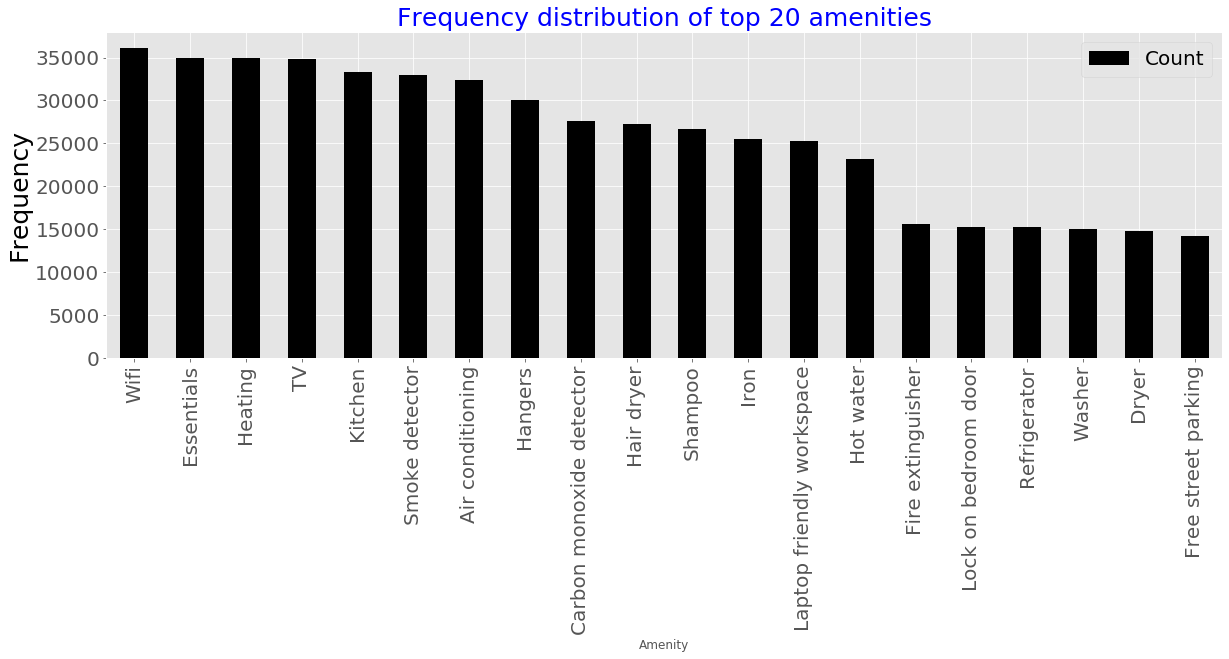

,Amenity,Count
0,TV,34788
1,Wifi,36147
2,Air conditioning,32429
3,Kitchen,33300
4,Paid parking off premises,4443
...,...,...
123,Ground floor access,8
124,Air purifier,6
125,Mobile hoist,8
126,Kitchenette,3


In [101]:
def amenities_frequency(amenities):
    fdist = FreqDist(amenities)
    d = pd.DataFrame({'Amenity': list(fdist.keys()),'Count': list(fdist.values())})
    d2=d.copy()
    d2 = d2.nlargest(columns="Count", n = 20)
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    plt.style.use(style='ggplot')
    d2.plot(x='Amenity',y='Count',kind='bar',color='black')
    plt.ylabel('Frequency',fontsize=25,color='black')
    plt.title('Frequency distribution of top 20 amenities',fontsize=25,color='blue')
    plt.tick_params(labelsize=20)
    plt.xticks(rotation='vertical')
    plt.show()
    return d
amenities_frequency(all_amenities)

Analizing average price per amenity 

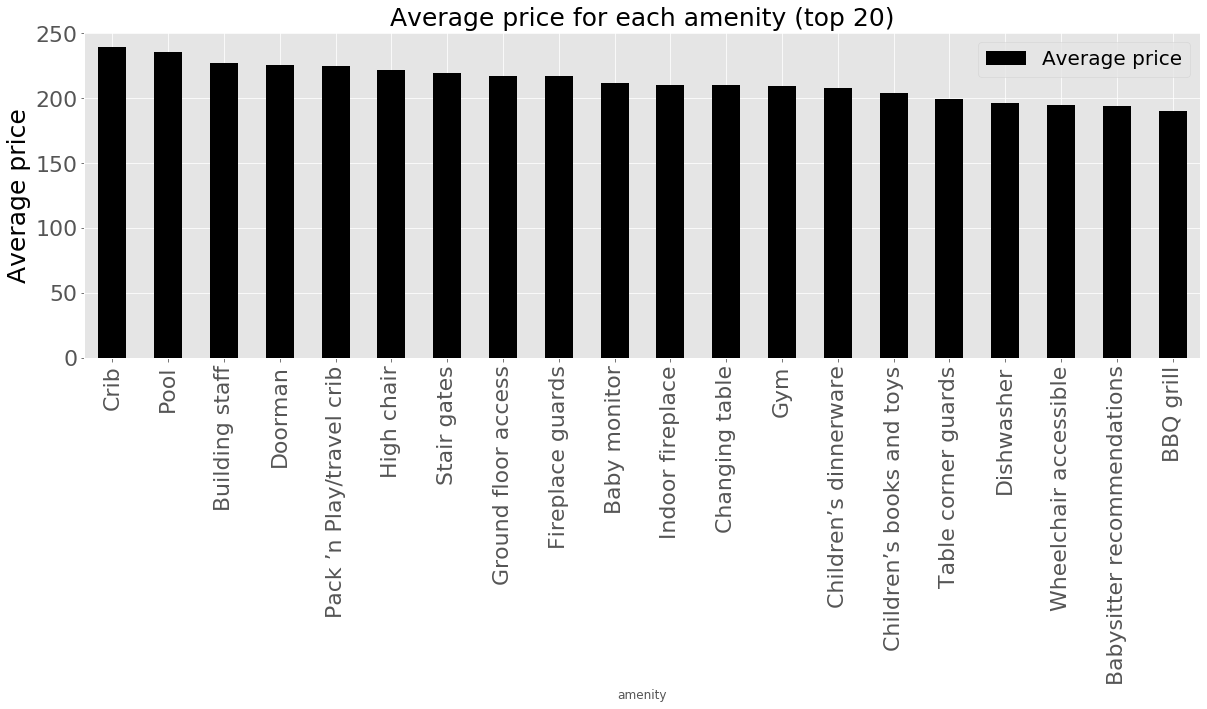

In [102]:
def average_price_amenity(df,unique_amenities):
    amenity_prices = [
        (amn, df[df['amenities'].map(lambda amns: amn in amns)]['price'].mean()) 
        for amn in unique_amenities
    ]
    amenity_vs_price = pd.Series(data=[a[1] for a in amenity_prices], 
                                 index=[a[0] for a in amenity_prices])
    amenity_vs_price = amenity_vs_price.to_frame().reset_index()
    amenity_vs_price = amenity_vs_price.rename(
        columns= {0: 'Average price','index': 'amenity'})
    d2 = amenity_vs_price.nlargest(columns='Average price', n = 20)
    d2.head()
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    plt.style.use(style='ggplot')
    d2.plot(x='amenity',y='Average price',kind='bar',color='black')
    plt.ylabel('Average price',fontsize=25,color='black')
    plt.title('Average price for each amenity (top 20)',fontsize=25,color='black')
    plt.tick_params(labelsize=22)
    plt.xticks(rotation='vertical')
    plt.show()
average_price_amenity(data, unique_amenities)

Now lets take a look at the median

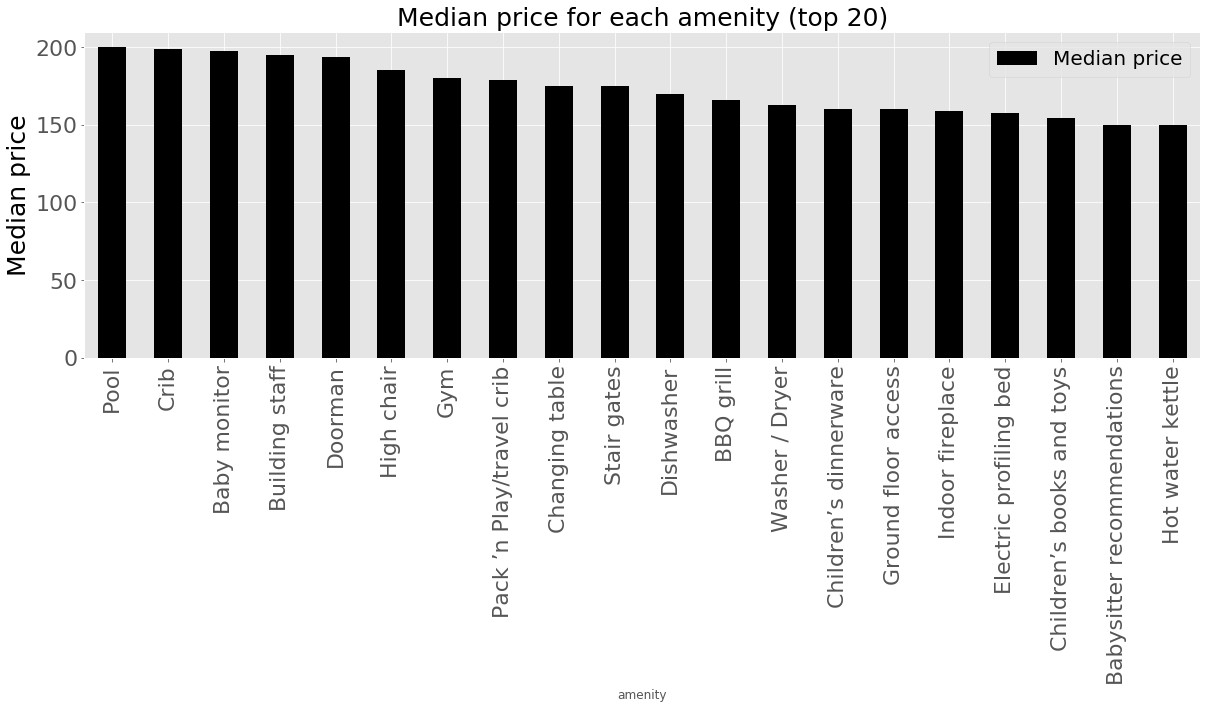

In [103]:
def median_price_amenity(df,unique_amenities):
    amenity_prices = [
        (amn, df[df['amenities'].map(lambda amns: amn in amns)]['price'].median()) 
        for amn in unique_amenities
    ]
    amenity_vs_price = pd.Series(data=[a[1] for a in amenity_prices], 
                                 index=[a[0] for a in amenity_prices])
    amenity_vs_price = amenity_vs_price.to_frame().reset_index()
    amenity_vs_price = amenity_vs_price.rename(
        columns= {0: 'Median price','index': 'amenity'})
    d2 = amenity_vs_price.nlargest(columns='Median price', n = 20)
    d2.head()
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    plt.style.use(style='ggplot')
    d2.plot(x='amenity',y='Median price',kind='bar',color='black')
    plt.ylabel('Median price',fontsize=25,color='black')
    plt.title('Median price for each amenity (top 20)',fontsize=25,color='black')
    plt.tick_params(labelsize=22)
    plt.xticks(rotation='vertical')
    plt.show()
median_price_amenity(data, unique_amenities)

## Analizing correlation between features

In [104]:
correlation = data.corr()

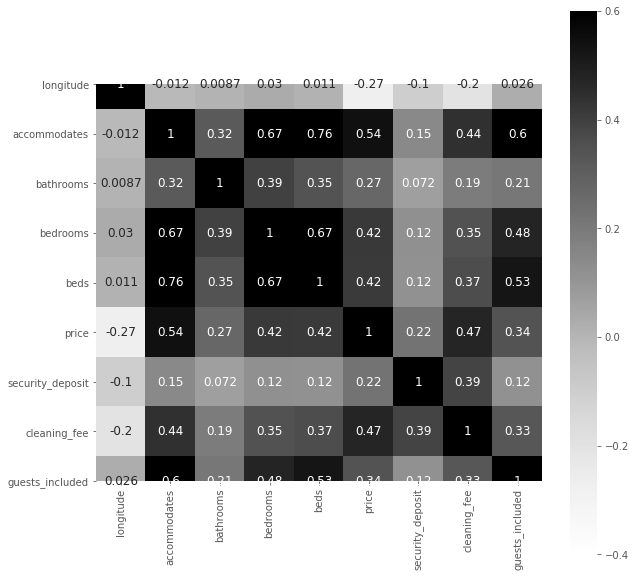

In [105]:
correlation_f = correlation.index[abs(correlation["price"])>0.2]
plt.figure(figsize=(10,10))
sns.heatmap(data[correlation_f].corr(), annot = True, cmap = "Greys", 
                cbar = True, vmin = -0.4, vmax = 0.6, square=True, annot_kws={"size": 12})